# **Capstone Project: Regression - Final Submission**

## **Executive Summary:**
This project proposes a Random Forest model to predict the price of used cars in India. The suggested model possesses a generalized performance over the observed data. In addition, the recommended model has promising results in regression model evaluation metrics. Random Forest is suitable for use cases with a large dataset but needs a higher training time. Dealing with large datasets has drawbacks, like complexity and a time-consuming process requiring more resources. It is recommended that the stakeholders consider these factors in building improved long-term predictive models and external considerations such as consumer behavior and the trend of the automotive sector in the nation.

## **The Objectives:**

The key objective of this project is to build a pricing model that can effectively predict the price of used cars and help the business devise profitable strategies using differential pricing. The regression analysis presented here provides insight into the factors that significantly influence the prices of used vehicles in India, utilizes feature engineering techniques to increase predictive power, and offers prediction quality metrics. The discussed analysis and regression models will help understand the price prediction for the unseen data. Additionally, it serves as a basis for recommendations for Cars4U company to formulate profitable strategies to have a foothold in this used cars industry.

## **The Key Questions:**

1. What are the most important features affecting the price of pre-owned cars?

2. Does the name of the car influence the price of used cars?

3. Does the location where the car is being sold affect the price of used cars?

4. How about the cars’ age (i.e., the manufacturing year)? Does it affect the price of used cars?

5. Do the kilometers driven by previous owners and the standard mileage affect the price of used cars?

6. How do the transmission type, engine, power, and the number of seats affect the price of used cars?

## **Problem Summary**:

There is a huge demand for used cars in the Indian market today. Moreover, as sales of new vehicles have slowed down recently, the pre-owned car market has continued to grow over the past years and is larger than the new car market. In 2018-19, while brand new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. In addition, there is a slowdown in brand-new car sales, which could mean that the demand is shifting towards the used market.

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

In [1]:
!pip install scikit-learn==0.24.2

### **Loading libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

In [3]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.7.
The scikit-learn version is 0.24.2.


In [4]:
!pip install pandas==1.0.5

In [5]:
!pip install Numpy==1.18.5

In [6]:
print('The pandas version is {}.'.format(pd.__version__))
print('The numpy version is {}.'.format(np.__version__))

The pandas version is 1.0.5.
The numpy version is 1.18.5.


### **Let us load the data**

In [7]:
#data = pd.read_csv('/content/drive/MyDrive/ADSP - Google Colab Intro/used_cars.csv')
data = pd.read_csv(r"C:\Users\rizaldy.t.nuque\OneDrive - Accenture\Documents\FY22\03-Continuous Learning\MIT\Great Learning\ADSP\Course Delivery\Capstone\Notebooks and Datasets\used_cars.csv")

### **Understand the data by observing a few rows**

In [8]:
# View the first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [9]:
# View the last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


#### **Observations and Insights:

• There are missing data (NaN: Not a Number) under New_Price and Price variables.

• S.No. variable is only an ID variable. Therefore, we assume they don't have any predictive power to predict the dependent variable, the Price of the used cars.

### **Let us check the data types and and missing values of each column** 

In [10]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


#### **Observations and Insights:

• There are 7,253 observations and 14 columns in the data.

• Out of the 14 columns, 9 are numeric data type, and 5 are object data type.

In [11]:
# Check total number of missing values of each column. Hint: Use isnull() method
# data.isnull().sum()
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
New_price,6247,0.861299
Price,1234,0.170136
Power,175,0.024128
Seats,53,0.007307
Engine,46,0.006342
Mileage,2,0.000276
Owner_Type,0,0.000000
Transmission,0,0.000000
Fuel_Type,0,0.000000
Kilometers_Driven,0,0.000000


#### **Observations and Insights:

• There are around 86% missing data in the New_Price column and 17% in the Price variable.

• We observed several other variables with missing data (i.e., Power, Seats, Engine, and Mileage columns).

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [12]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(['S.No.'], axis = 1, inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [14]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


#### **Observations and Insights:

• The average manufacturing year of the used cars is 2013. In addition, 50% were manufactured in 2014, and 75% in 2016.

• The oldest cars sold were manufactured in 1996, and the latest ones are relatively brand-new, with a manufacture date of 2019.

• The average kilometers driven by the pre-owned cars were roughly around ~59,000. 50% of the observations have ~53,000 kilometers, and 75% have ~73,000 kilometers. The minimum distance driven is 171, while the maximum is 6,500,000 kilometers. The significant standard deviation of ~84,000 kilometers indicates a lot of variance in the observed data around the mean (i.e., the data observed is relatively spread out). And, potentially, there might be some outliers.

• The average mileage is 18 kilometers per liter. The used cars have a mileage of 0 is interesting to find out. Brand-new cars have 0 mileage. However, these are pre-owned. Therefore, it is assumed that some mileage will be recorded on those vehicles. The maximum mileage is around 33 kilometers per liter. 50% of the cars have ~18 kmpl. The standard deviation is minimal, which indicates the observed data is clustered tightly around the mean.

• 50% of the Engine have 1493 CC, and 50% of the cars have 138 bhp Power. In addition, these features have a significant standard deviation, which means the observed data is relatively spread out.

• We observed that the used cars in the dataset have a two-seater minimum and a 10-seater maximum. But the majority of the cars are five-seater.

• The Price range of the used cars is from INR 44,000 to 16,000,000. Moreover, 50% of the cars have a price of around 564,000.

• On the other hand, the Price range of the new cars is from INR 391,000 to 37,500,000. In addition, 50% of the new vehicles are valued at 1,157,000, double the pre-owned cars.

• The Price variable has a lower standard deviation than the New_Price.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [15]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object']
data.describe(include=['object']).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [16]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].nunique())
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


#### **Observations and Insights:

• The Name feature has 2,041 unique values. Mahindra XUV500 W8 2WD is the top-most recurring, which appeared 55 times in the dataset.

• Mumbai is the most frequently mentioned location where cars were sold with 948 times. Location shows 11 unique values.

• The Fuel Type variable has 5 unique values, and Diesel is the most common in the dataset.

• Transmission has 2 unique values (i.e., automatic and manual), and the majority have manual Transmission.

• Owner Type has 4 unique values, and the majority of the cars are registered under the first owner.

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [17]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(['Kilometers_Driven'], ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights:

• The above table validates our earlier observation that the maximum total distance driven by previous owner(s) is 6,500,000 kilometers for a 2017 BMW. There might be some errors on this because the car is relatively new.

• We also pointed out earlier that the data observed in Kilometer_Driven is rather spread out. So there might be the presence of some outliers.

• The majority of the cars are five-seater, as observed earlier. In addition, there are a lot of NaN in the New_Price column.

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [18]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(data.index[2328], inplace = True)

In [19]:
# Validate that the max value of Kilometers-Driven was dropped
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.364865,3.254365,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7252.0,57810.852868,37499.537277,171.00,34000.000,53404.00,73000.0000,775000.00
Mileage,7250.0,18.141880,4.562440,0.00,15.170,18.16,21.1000,33.54
Engine,7206.0,1616.382459,595.105530,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7077.0,112.744692,53.469461,34.20,75.000,94.00,138.1000,616.00
Seats,7199.0,5.280456,0.809327,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6018.0,9.470243,11.165926,0.44,3.500,5.64,9.9500,160.00


**Check Mileage extreme values**

In [20]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(['Mileage'], ascending = True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [21]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

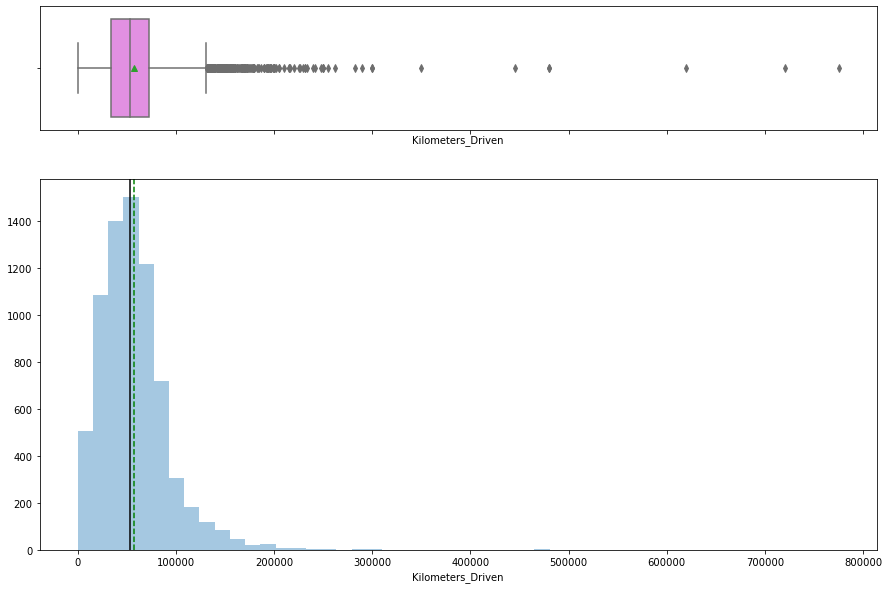

In [22]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

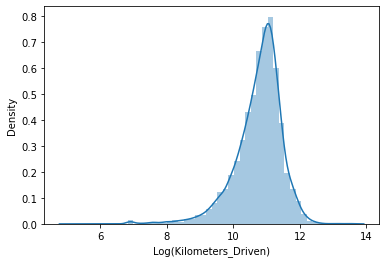

In [23]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

#### **Observations and Insights:

• We have treated the earlier skewed Kilometers_Driven feature to normality using the log transformation.

• The kilometers_Driven feature is normally distributed after applying the log transformation technique. Let's see later if there's a benefit in our regression model.

In [24]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

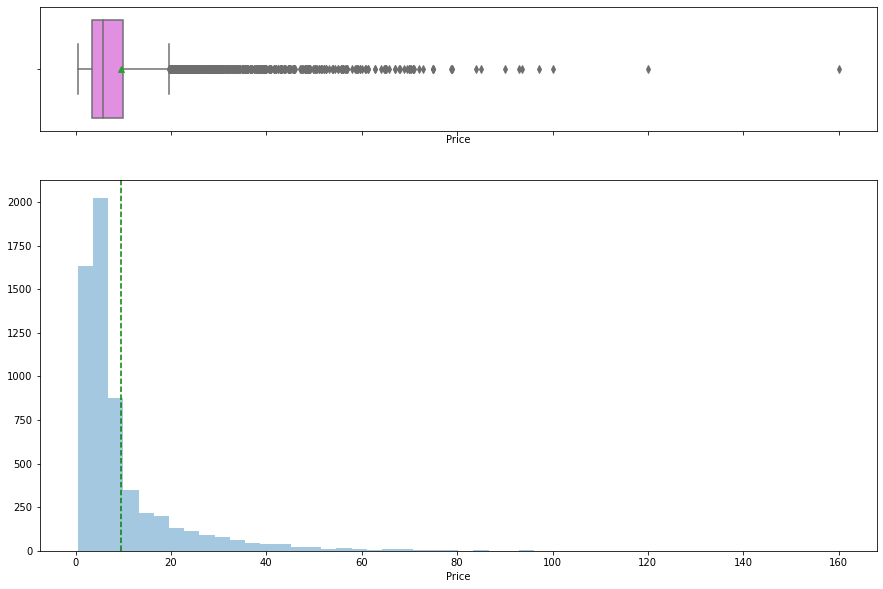

In [25]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

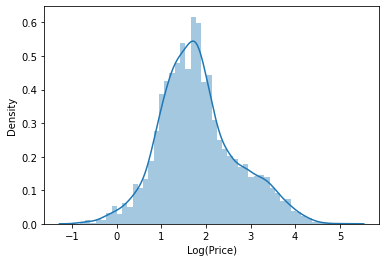

In [26]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

In [27]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

#### **Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

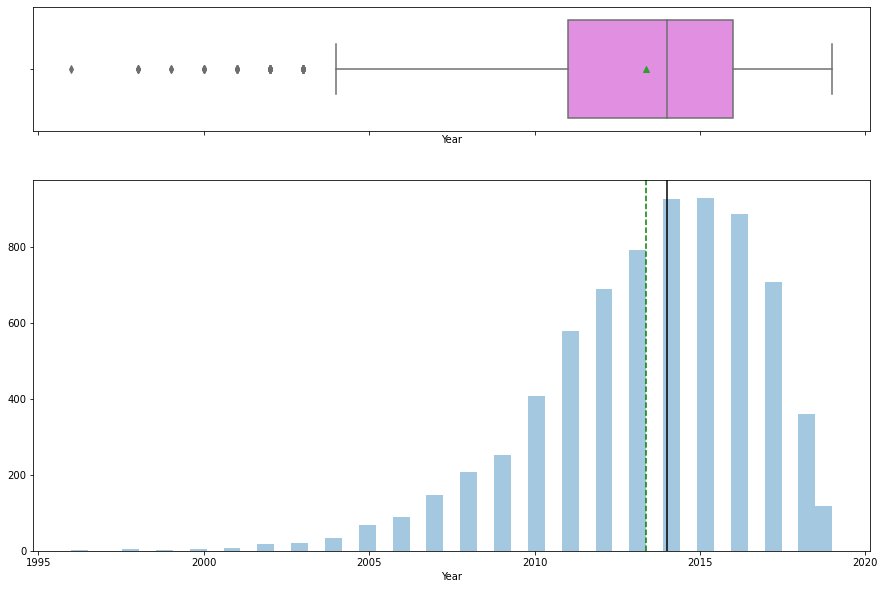

In [28]:
#Plot histogram and box-plot for 'Year'
histogram_boxplot(data['Year'])

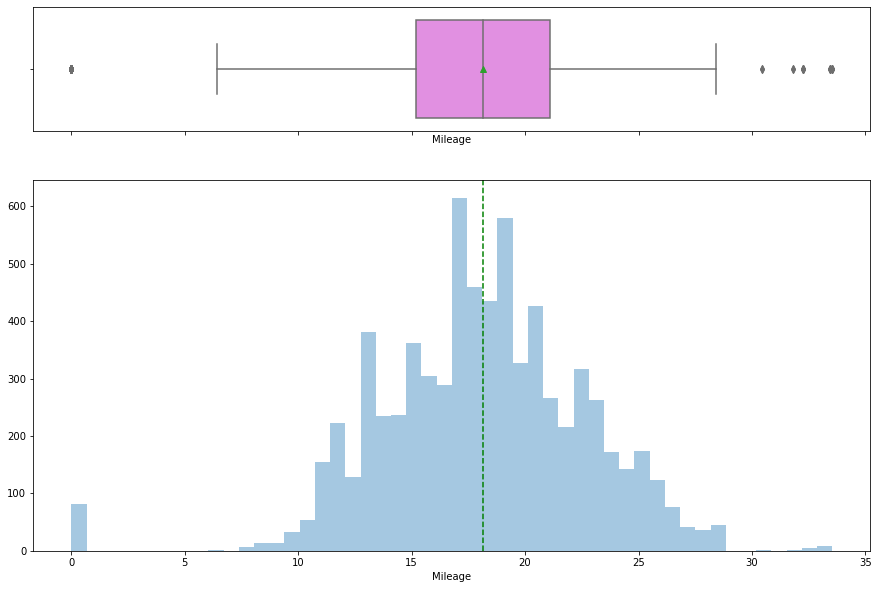

In [29]:
#Plot histogram and box-plot for 'Mileage'
histogram_boxplot(data['Mileage'])

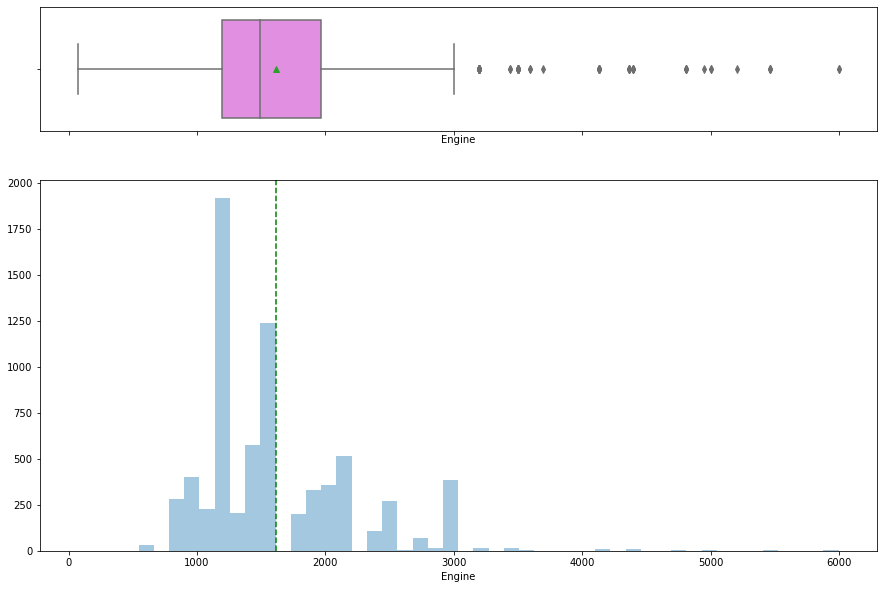

In [30]:
#Plot histogram and box-plot for 'Engine'
histogram_boxplot(data['Engine'])

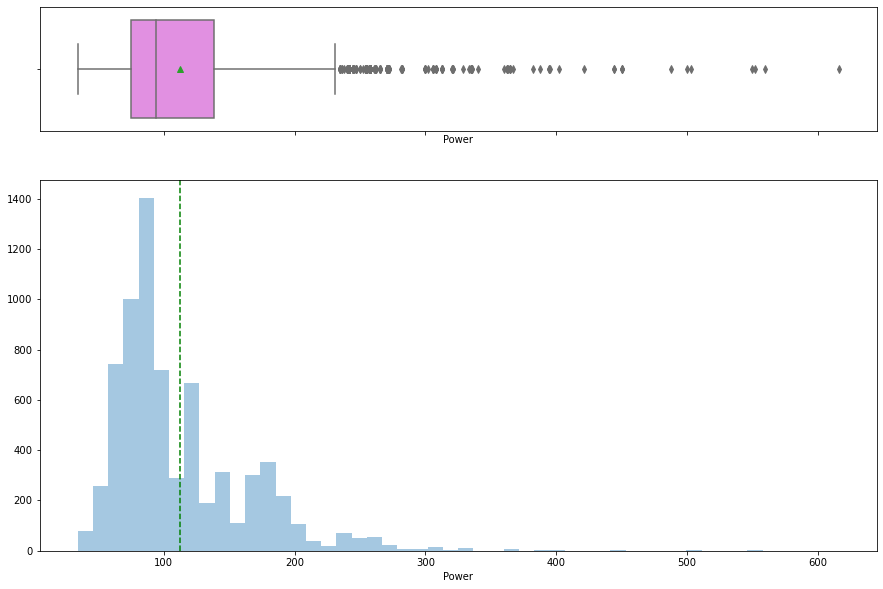

In [31]:
#Plot histogram and box-plot for 'Power'
histogram_boxplot(data['Power'])

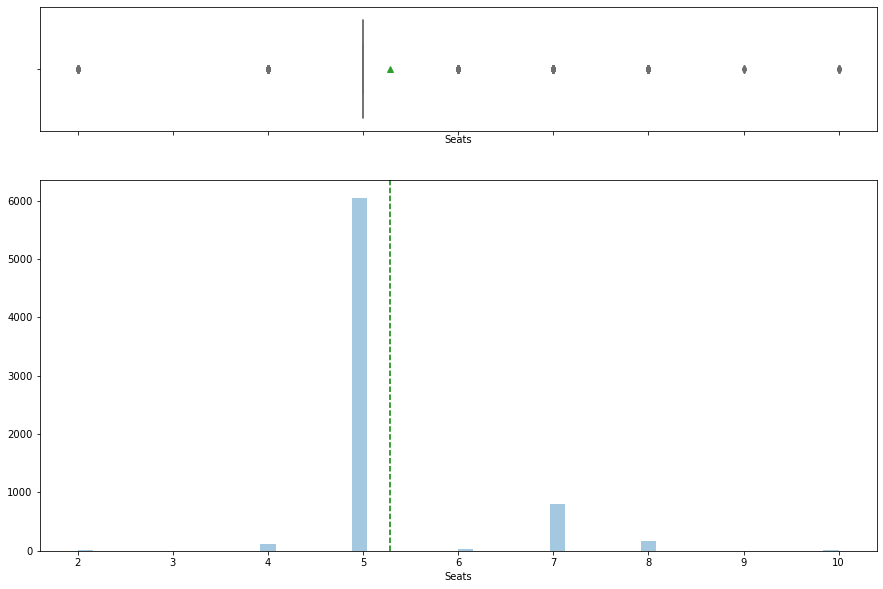

In [32]:
#Plot histogram and box-plot for 'Seats'
histogram_boxplot(data['Seats'])

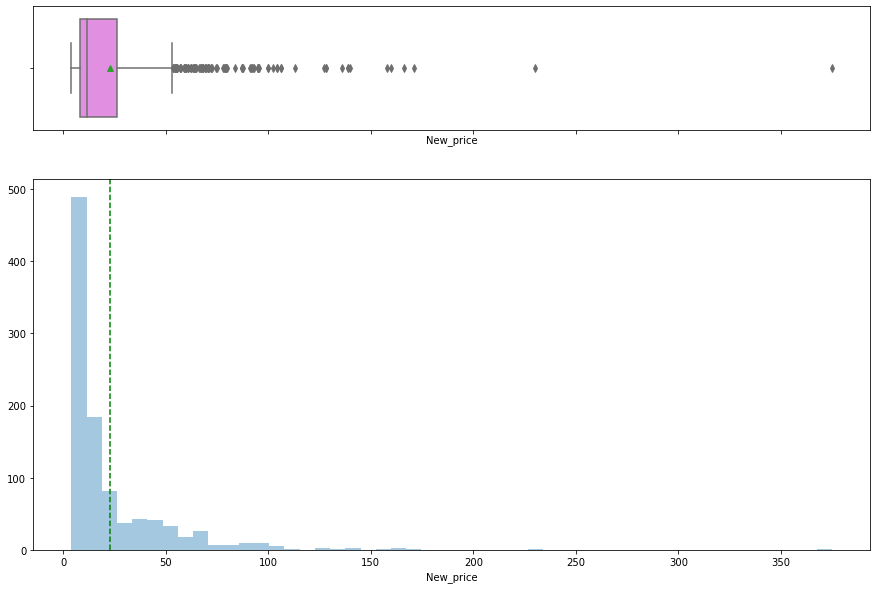

In [33]:
#Plot histogram and box-plot for 'New_price'
histogram_boxplot(data['New_price'])

#### **Observations and Insights:

• Kilometers_Driven feature is highly right-skewed (i.e., it has a long right tail). In addition, there are some outliers observed on the right side. We used the log transformation technique to normalize the distribution.

• Like the Kilometers_Driven, the Price feature is highly right-skewed (i.e., it has a long right tail). In addition, there are some outliers observed on the right side. We used the log transformation technique to normalize the distribution.

• Year feature is negatively skewed (i.e., has a long left tail). There are some outliers observed on the left side.

• 2015 is the most Year in the inventory of used cars sold.

• Mileage is almost normally distributed, with some outliers observed.

• The observed data in Mileage are clustered tightly around the mean. This is because used cars having a Mileage between 15 – 21 km/l sell the most.

• The Engine feature is positively skewed (i.e., it has a long right tail). There are some outliers observed on the right side.

• Used cars with Engines between 1,300 – 1,500 CC sell the most.

• Like the Engine, the Power feature is positively skewed (i.e., it has a long right tail). There are some outliers observed on the right side.

• Used cars with 80 – 90 brake horsepower (bhp) are the most saleable in this dataset.

• As expected, the number of Seats feature shows a discrete probability distribution. That means the occurrences have countable or finite outcomes.

• This validates our earlier observation that buyers of pre-owned cars heavily patronize five-seater cars.

• Similar to the distribution of the Price feature, New_price is also highly skewed to the right. Later on, let's see if we need to use log transformation on this column to see if that helps normalize the distribution. There are several outliers observed in the data.

## **2. Univariate analysis - Categorical Data**

In [34]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot

#### Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

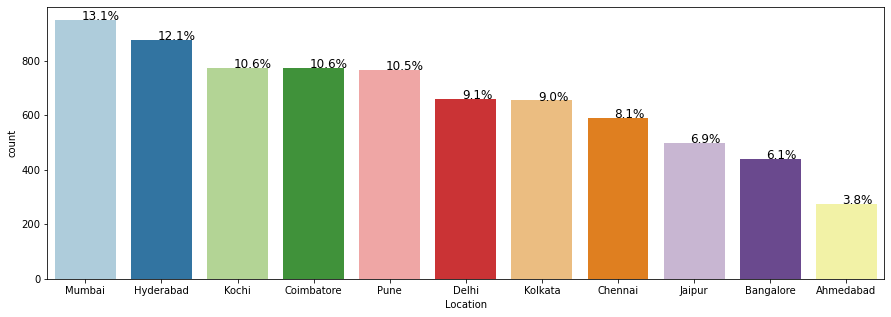

In [35]:
#Bar Plot for 'Location'
perc_on_bar('Location')

#### **Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`

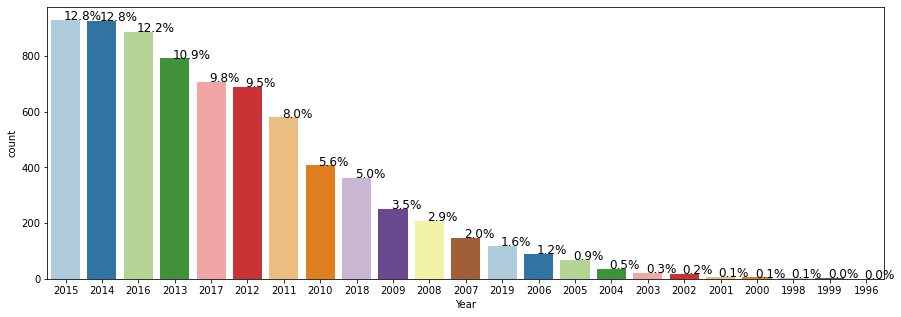

In [36]:
#Bar Plot for 'Year'
perc_on_bar('Year')

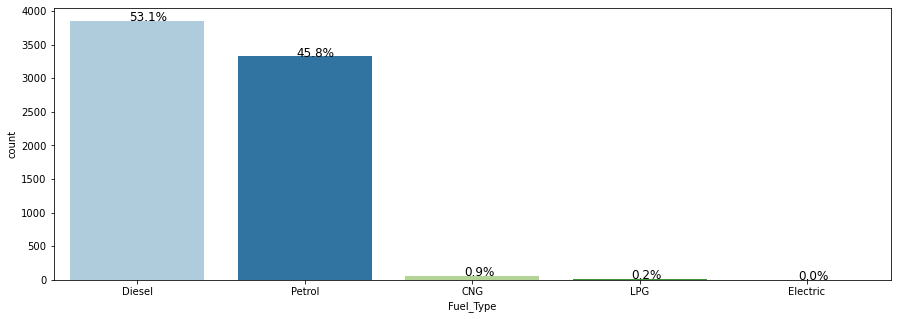

In [37]:
#Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

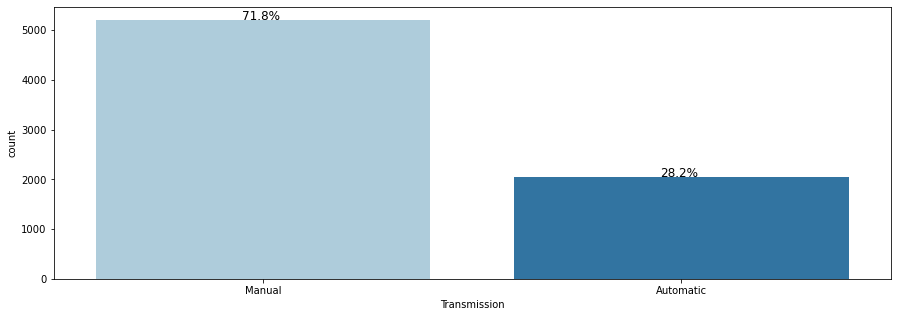

In [38]:
#Bar Plot for 'Transmission'
perc_on_bar('Transmission')

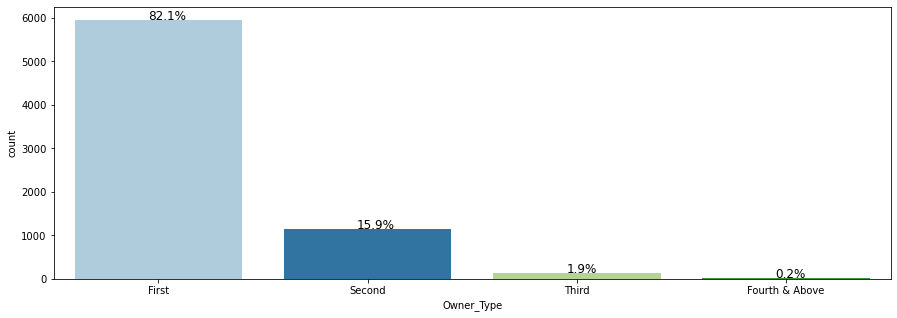

In [39]:
#Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

#### **Observations and Insights:

• Mumbai has the highest sales of used cars in India, followed by Hyderabad.

• On the other hand, Bangalore and Ahmedabad had the lowest sales recorded.

• Customers prefer to buy pre-owned vehicles manufactured recently due to the enhanced automotive features – like more power over the years.

• Customers prefer to buy Diesel Fuel_Type followed by Petrol.

• There's very little presence of Electric vehicles during the period covered by the dataset. However, this could be an excellent opportunity to capitalize on this market due to global sustainability initiatives to address carbon footprint.

• Manual Transmission cars are more saleable than automatic Transmission cars, ~82% and ~28%, respectively. This could be related to external factors not stated in the dataset.

• Buyers prefer to purchase pre-owned cars listed by the first owner. This accounts for ~82% of sales.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

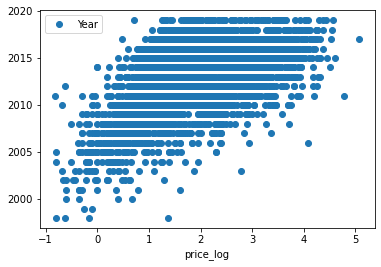

In [40]:
#Let us plot pair plot for the variables 'price_log' and 'year'
data.plot(x='price_log', y='Year', style='o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

<AxesSubplot:xlabel='price_log'>

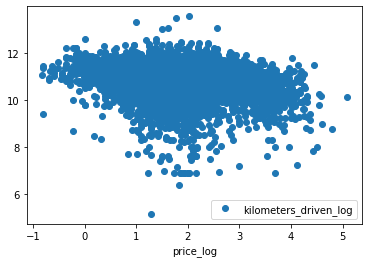

In [41]:
#Let us plot pair plot for the variables 'price_log' and 'kilometers_driven_log'
data.plot(x='price_log', y='kilometers_driven_log', style='o')

<AxesSubplot:xlabel='price_log'>

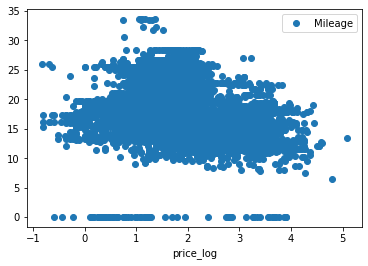

In [42]:
#Let us plot pair plot for the variables 'price_log' and 'Mileage'
data.plot(x='price_log', y='Mileage', style='o')

<AxesSubplot:xlabel='price_log'>

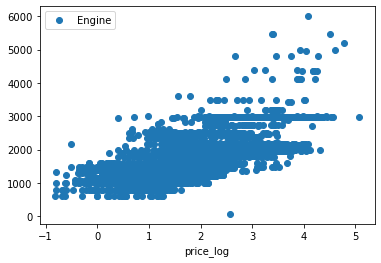

In [43]:
#Let us plot pair plot for the variables 'price_log' and 'Engine'
data.plot(x='price_log', y='Engine', style='o')

<AxesSubplot:xlabel='price_log'>

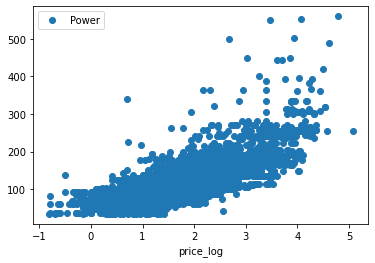

In [44]:
#Let us plot pair plot for the variables 'price_log' and 'Power'
data.plot(x='price_log', y='Power', style='o')

<AxesSubplot:xlabel='price_log'>

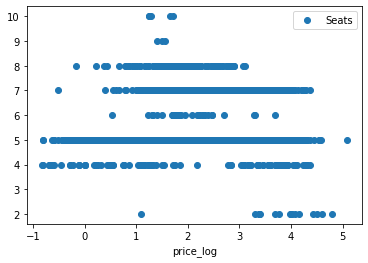

In [45]:
#Let us plot pair plot for the variables 'price_log' and 'Seats'
data.plot(x='price_log', y='Seats', style='o')

<AxesSubplot:xlabel='price_log'>

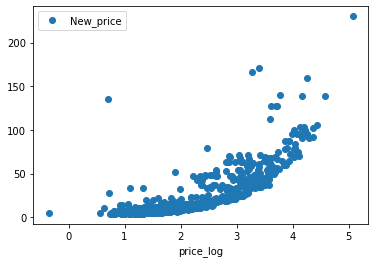

In [46]:
#Let us plot pair plot for the variables 'price_log' and 'New_price'
data.plot(x='price_log', y='New_price', style='o')

<AxesSubplot:xlabel='price_log'>

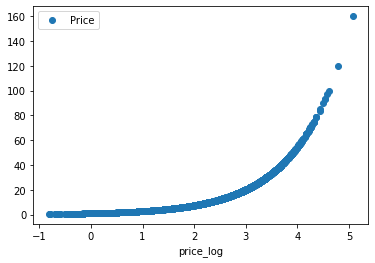

In [47]:
#Let us plot pair plot for the variables 'price_log' and 'Price'
data.plot(x='price_log', y='Price', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

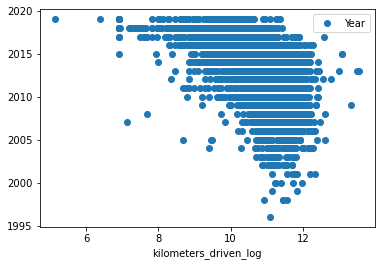

In [48]:
#Let us plot pair plot for the variables 'kilometers_driven_log' and 'Year'
data.plot(x='kilometers_driven_log', y='Year', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

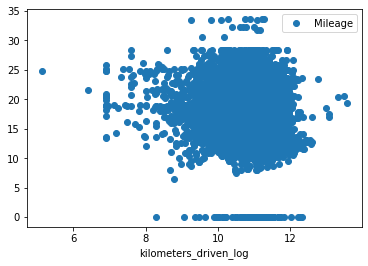

In [49]:
#Let us plot pair plot for the variables 'kilometers_driven_log' and 'Mileage'
data.plot(x='kilometers_driven_log', y='Mileage', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

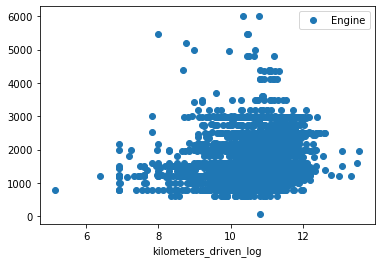

In [50]:
#Let us plot pair plot for the variables 'kilometers_driven_log' and 'Engine'
data.plot(x='kilometers_driven_log', y='Engine', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

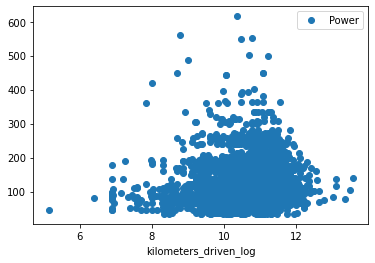

In [51]:
#Let us plot pair plot for the variables 'kilometers_driven_log' and 'Power'
data.plot(x='kilometers_driven_log', y='Power', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

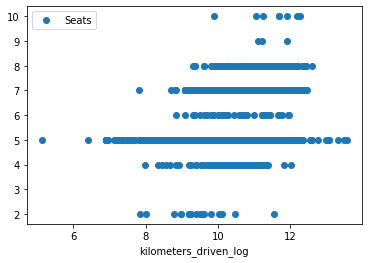

In [52]:
#Let us plot pair plot for the variables 'kilometers_driven_log' and 'Seats'
data.plot(x='kilometers_driven_log', y='Seats', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

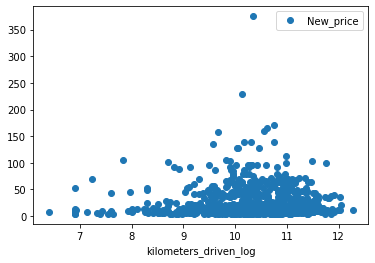

In [53]:
#Let us plot pair plot for the variables 'kilometers_driven_log' and 'New_price'
data.plot(x='kilometers_driven_log', y='New_price', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

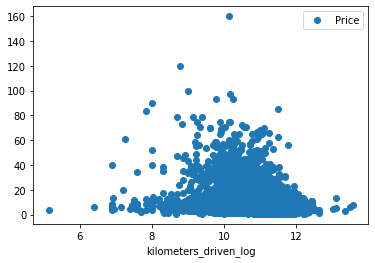

In [54]:
#Let us plot pair plot for the variables 'kilometers_driven_log' and 'Price'
data.plot(x='kilometers_driven_log', y='Price', style='o')

<AxesSubplot:xlabel='kilometers_driven_log'>

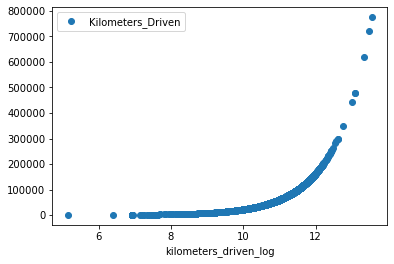

In [55]:
#Let us plot pair plot for the variables 'kilometers_driven_log' and 'Kilometers_Driven'
data.plot(x='kilometers_driven_log', y='Kilometers_Driven', style='o')

<AxesSubplot:xlabel='Year'>

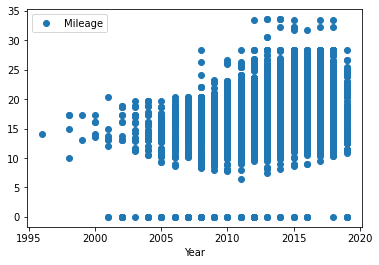

In [56]:
#Let us plot pair plot for the variables 'Year' and 'Mileage'
data.plot(x='Year', y='Mileage', style='o')

<AxesSubplot:xlabel='Year'>

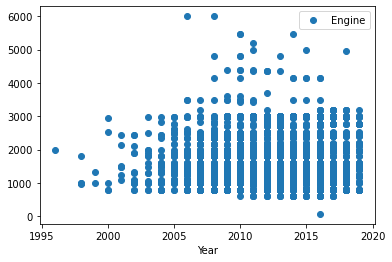

In [57]:
#Let us plot pair plot for the variables 'Year' and 'Engine'
data.plot(x='Year', y='Engine', style='o')

<AxesSubplot:xlabel='Year'>

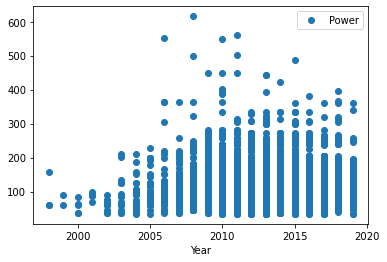

In [58]:
#Let us plot pair plot for the variables 'Year' and 'Power'
data.plot(x='Year', y='Power', style='o')

<AxesSubplot:xlabel='Year'>

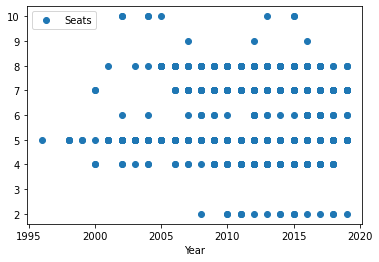

In [59]:
#Let us plot pair plot for the variables 'Year' and 'Seats'
data.plot(x='Year', y='Seats', style='o')

<AxesSubplot:xlabel='Year'>

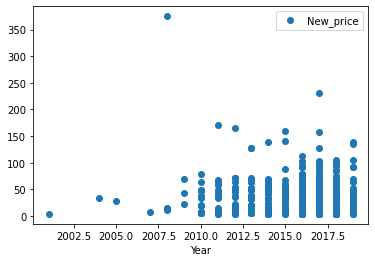

In [60]:
#Let us plot pair plot for the variables 'Year' and 'New_price'
data.plot(x='Year', y='New_price', style='o')

<AxesSubplot:xlabel='Year'>

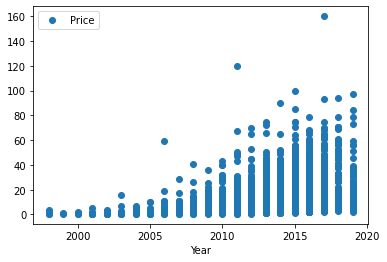

In [61]:
#Let us plot pair plot for the variables 'Year' and 'Price'
data.plot(x='Year', y='Price', style='o')

<AxesSubplot:xlabel='Mileage'>

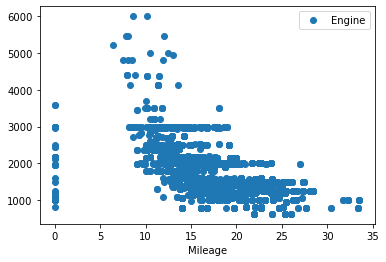

In [62]:
#Let us plot pair plot for the variables 'Mileage' and 'Engine'
data.plot(x='Mileage', y='Engine', style='o')

<AxesSubplot:xlabel='Mileage'>

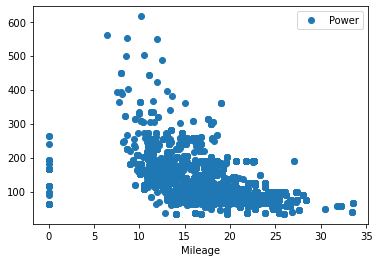

In [63]:
#Let us plot pair plot for the variables 'Mileage' and 'Power'
data.plot(x='Mileage', y='Power', style='o')

<AxesSubplot:xlabel='Mileage'>

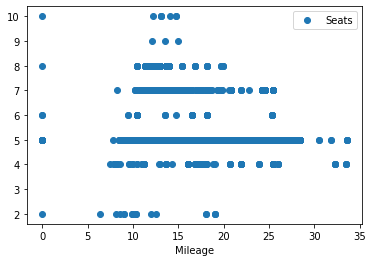

In [64]:
#Let us plot pair plot for the variables 'Mileage' and 'Seats'
data.plot(x='Mileage', y='Seats', style='o')

<AxesSubplot:xlabel='Mileage'>

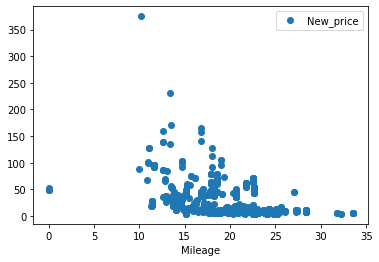

In [65]:
#Let us plot pair plot for the variables 'Mileage' and 'New_price'
data.plot(x='Mileage', y='New_price', style='o')

<AxesSubplot:xlabel='Mileage'>

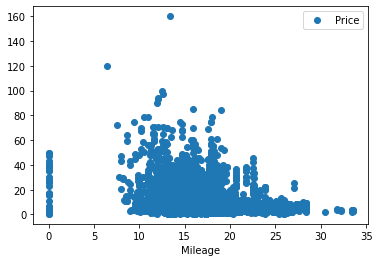

In [66]:
#Let us plot pair plot for the variables 'Mileage' and 'Price'
data.plot(x='Mileage', y='Price', style='o')

<AxesSubplot:xlabel='Engine'>

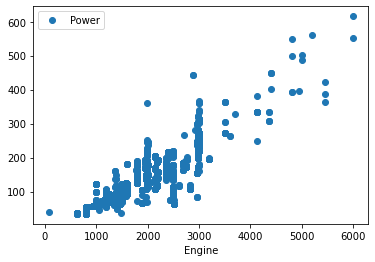

In [67]:
#Let us plot pair plot for the variables 'Engine' and 'Power'
data.plot(x='Engine', y='Power', style='o')

<AxesSubplot:xlabel='Engine'>

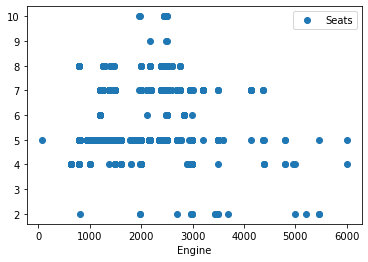

In [68]:
#Let us plot pair plot for the variables 'Engine' and 'Seats'
data.plot(x='Engine', y='Seats', style='o')

<AxesSubplot:xlabel='Engine'>

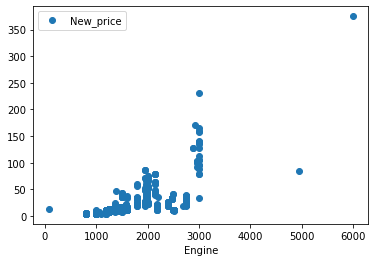

In [69]:
#Let us plot pair plot for the variables 'Engine' and 'New_price'
data.plot(x='Engine', y='New_price', style='o')

<AxesSubplot:xlabel='Engine'>

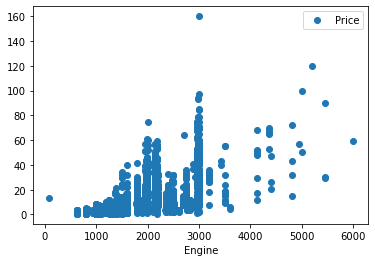

In [70]:
#Let us plot pair plot for the variables 'Engine' and 'Price'
data.plot(x='Engine', y='Price', style='o')

<AxesSubplot:xlabel='Power'>

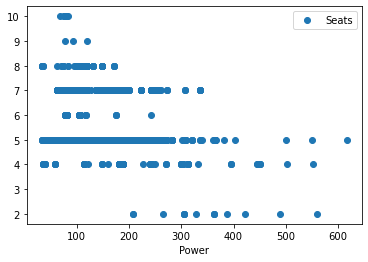

In [71]:
#Let us plot pair plot for the variables 'Power' and 'Seats'
data.plot(x='Power', y='Seats', style='o')

<AxesSubplot:xlabel='Power'>

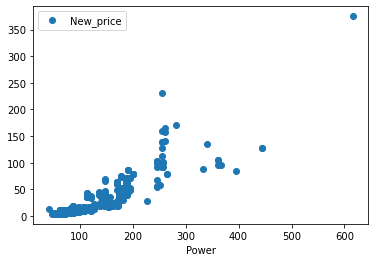

In [72]:
#Let us plot pair plot for the variables 'Power' and 'New_price'
data.plot(x='Power', y='New_price', style='o')

<AxesSubplot:xlabel='Power'>

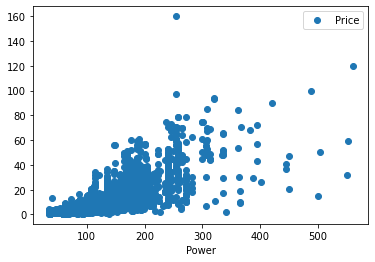

In [73]:
#Let us plot pair plot for the variables 'Power' and 'Price'
data.plot(x='Power', y='Price', style='o')

<AxesSubplot:xlabel='Seats'>

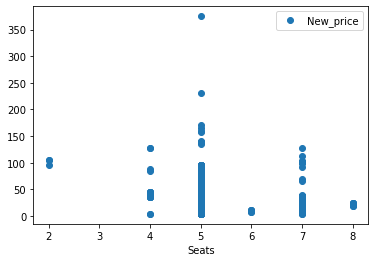

In [74]:
#Let us plot pair plot for the variables 'Seats' and 'New_price'
data.plot(x='Seats', y='New_price', style='o')

<AxesSubplot:xlabel='Seats'>

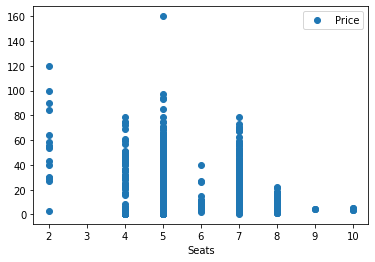

In [75]:
#Let us plot pair plot for the variables 'Seats' and 'Price'
data.plot(x='Seats', y='Price', style='o')

<AxesSubplot:xlabel='New_price'>

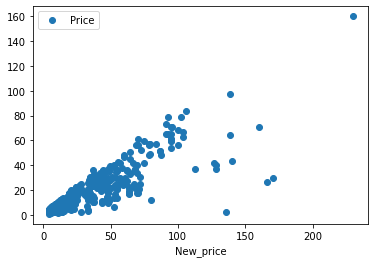

In [76]:
#Let us plot pair plot for the variables 'New_price' and 'Price'
data.plot(x='New_price', y='Price', style='o')

#### **Observations and Insights:

• The newer the car has a higher price than the old vehicles.

• Generally, the lower the Kilometers_Driven, the more expensive the cars.

• Mileage has the same behavior as Kilometers-Driven about Price's target variable.

• Engine and Power features are directly proportional to the Price – the higher the Engine and Power, the more expensive the vehicle. We observed some outliers, though.

• Two-seater cars (assumed sports cars) are expectedly more expensive. However, the Price of the five-seater vehicles (the most popular) varies.

• Recently manufactured cars have lesser Kilometers_Driven recorded.

• Kilometers_Driven and Mileage are directly proportional to each other.

• Vehicles with high Kilometers_Driven have Engines ranging from 1,000 to 3,000 CC.

• Similarly, cars with high Kilometers_Driven have Powers ranging from 100 to 200 bhp.

• Kilometers_Driven and Seats variables don't show a significant correlation.

### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

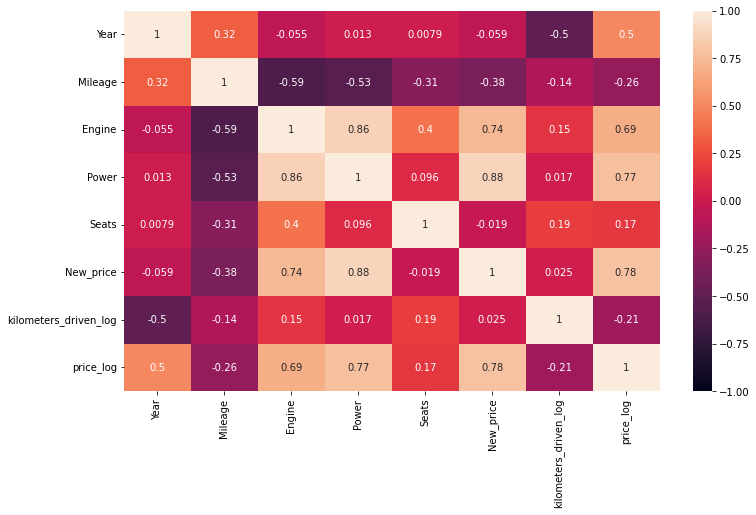

In [77]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Price', 'Kilometers_Driven'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

#### **Observations and Insights:

• Based on the above plot, the independent variables New_price, Power, and Engine have a strong positive correlation with the dependent variable price_log. While the independent variable Year has a moderate linear relationship with the dependent variable price_log.

• We also observed other strong positive correlations like Power and Engine, Power and New_price.

• On the other hand, there's a negative correlation between the independent variables kilometers_driven_log and Mileage with the dependent variable price_log.

• We also observed that Mileage has negative correlations to the dependent variable price_log, and all independent variables except the Year.

• The kilometers_driven_log variable negatively correlates with the Year the cars have been manufactured.

### **3. Box plot**

In [78]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

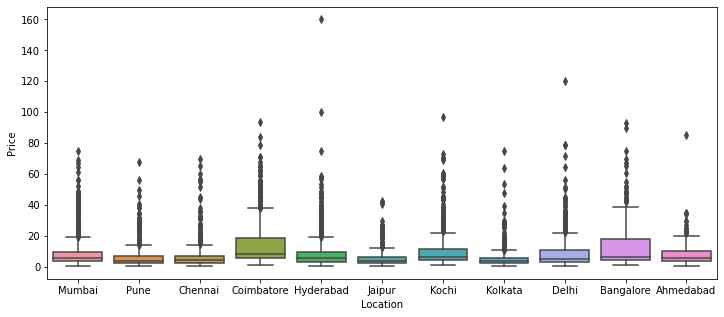

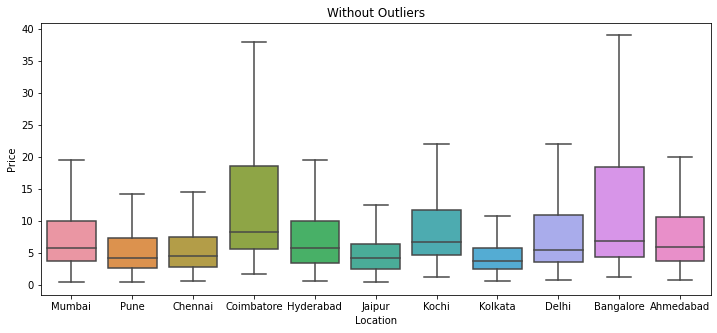

In [79]:
#Box Plot:Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

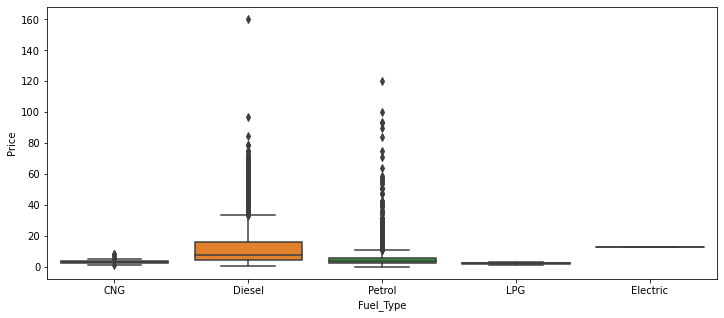

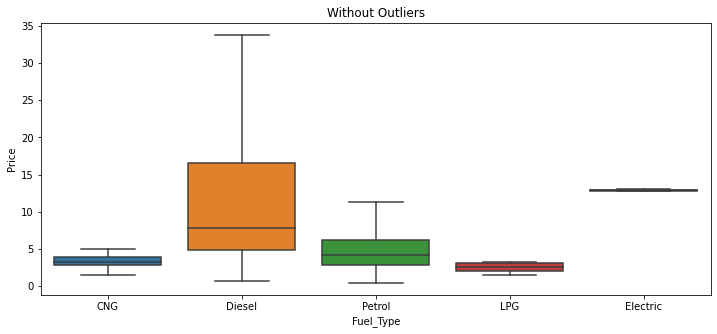

In [80]:
#Box Plot:Price vs Fuel_Type
boxplot(data['Fuel_Type'])

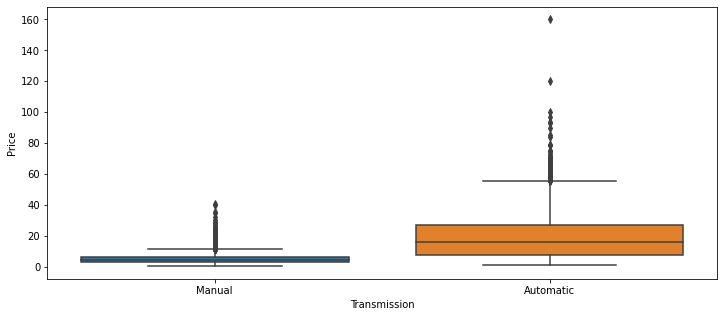

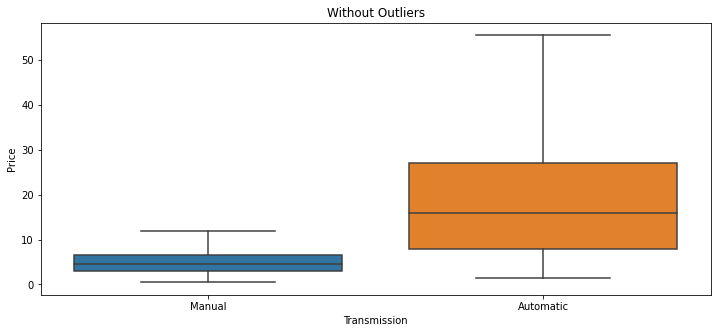

In [81]:
#Box Plot:Price vs Transmission
boxplot(data['Transmission'])

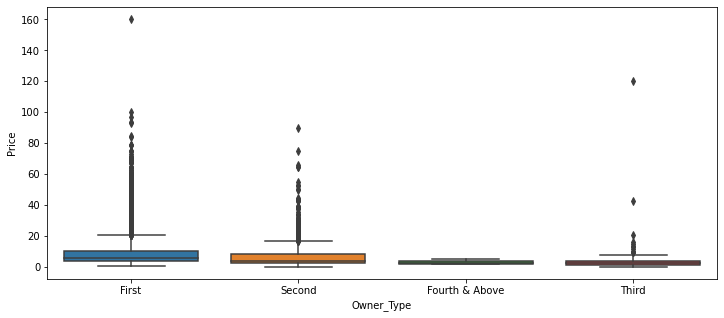

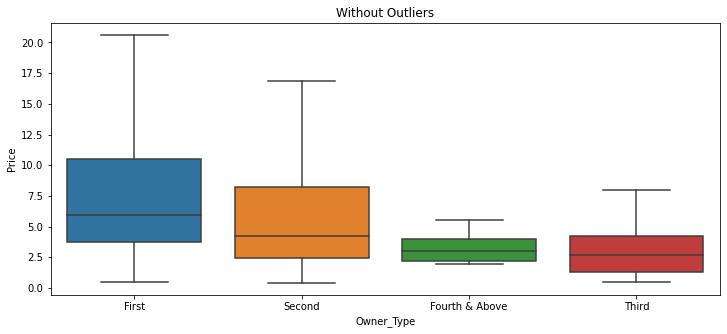

In [82]:
#Box Plot:Price vs Owner_Type
boxplot(data['Owner_Type'])

#### **Observations and Insights:

• Based on the above plot, the Price per location varies. In addition, in all 11 locations, there was the presence of outliers. The selling price of used cars is highest in Coimbatore and Bangalore, while cheaper used vehicles are sold in cities like Kolkata and Jaipur.

• The Diesel Fuel_Type is more expensive than the other fuel types. There are some outliers in the Diesel and Petrol fuel types. This validates our initial findings that there's very little presence of Electric vehicles during the period covered by the dataset, and the price is relatively high.

• Used cars with automatic tend to be more expensive than manual Transmission. Again, outliers were observed in both transmission types.

• Prices devalue as the vehicles' number of owners increases, which makes sense.

### **Feature engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [83]:
data.Name.nunique()

2041

In [84]:
data.Name.value_counts()

Mahindra XUV500 W8 2WD                    55
Maruti Swift VDI                          49
Maruti Swift Dzire VDI                    42
Honda City 1.5 S MT                       39
Maruti Swift VDI BSIV                     37
                                          ..
Maruti Alto Vxi 1.1                        1
Hyundai i20 Active SX Dual Tone Petrol     1
Ford Figo 1.5D Titanium Plus MT            1
Hyundai Santa Fe 4X2                       1
Skoda Yeti Ambition 4WD                    1
Name: Name, Length: 2041, dtype: int64

In [85]:
# Split Name into Brand + Model

data['Brand'] = data['Name'].str.split(' ').str[0]
data['Model'] = data['Name'].str.split(' ').str[1] + data['Name'].str.split(' ').str[2]

In [86]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [87]:
# Data Cleaning on Brand
col=['ISUZU','Isuzu','Mini','Land']
data[data.Brand.isin(col)].sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
3410,Land Rover Freelander 2 HSE SD4,Ahmedabad,2012,60000,Diesel,Automatic,Second,12.35,2179.0,187.74,5.0,NaN,23.50,11.002100,3.157000,Land,RoverFreelander
6470,Isuzu MU 7 4x2 HIPACK,Kolkata,2016,45000,Diesel,Manual,First,12.08,2999.0,161.00,7.0,NaN,NaN,10.714418,NaN,Isuzu,MU7
2306,Land Rover Range Rover Sport 2005 2012 HSE,Hyderabad,2010,45000,Diesel,Automatic,First,14.70,2993.0,241.40,6.0,NaN,40.00,10.714418,3.688879,Land,RoverRange
3242,Land Rover Range Rover Vogue SE 4.4 SDV8,Bangalore,2012,63000,Diesel,Automatic,Second,11.49,4367.0,335.30,5.0,NaN,65.00,11.050890,4.174387,Land,RoverRange
718,Mini Cooper S,Pune,2012,37000,Petrol,Automatic,Second,13.60,1598.0,181.00,4.0,NaN,17.00,10.518673,2.833213,Mini,CooperS
1988,Land Rover Freelander 2 SE,Mumbai,2012,34000,Diesel,Automatic,First,12.39,2179.0,147.51,5.0,NaN,19.25,10.434116,2.957511,Land,RoverFreelander
4755,Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic,Hyderabad,2016,52000,Diesel,Automatic,First,15.68,1999.0,177.00,5.0,74.49,42.00,10.858999,3.737670,Land,RoverRange
2711,Mini Cooper Convertible S,Kochi,2017,20469,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,44.28,35.98,9.926667,3.582963,Mini,CooperConvertible
6367,Land Rover Freelander 2 S Business Edition,Kochi,2015,61062,Diesel,Automatic,First,12.39,2179.0,147.51,5.0,NaN,NaN,11.019645,NaN,Land,RoverFreelander
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,Land,RoverRange


In [88]:
data.loc[data.Brand == 'ISUZU','Brand'] = 'Isuzu'
data.loc[data.Brand =='Mini','Brand'] = 'Mini Cooper'
data.loc[data.Brand =='Land','Brand'] = 'Land Rover'

In [89]:
data.Brand.nunique()

32

In [90]:
data.groupby(data.Brand).size().sort_values(ascending = False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               311
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
Hindustan           1
OpelCorsa           1
Smart               1
Ambassador          1
dtype: int64

In [91]:
data.Model.isnull().sum()

1

In [92]:
# Drop row without Model name
data.dropna(subset=['Model'], axis = 0, inplace = True)

In [93]:
data.Model.isnull().sum()

0

In [94]:
data.Model.nunique()

726

In [95]:
# Return the largest elements in the Model
data.groupby('Model')['Model'].size().nlargest()

Model
SwiftDzire    189
Grandi10      179
WagonR        178
Innova2.5     145
Verna1.6      127
Name: Model, dtype: int64

#### **Observations and Insights:

• We extracted vital information from the Name variable by splitting Brand and Model names.

• We observed some discrepancies in the Brand names, which we have corrected. For example, ISUZU and Isuzu are the same, Mini pertains to Mini Cooper, and Land appears to be Land Rover.

• Based on the data, the Maruti and Hyundai are the top two most marketable brands.

• In terms of the Model name, Swift Dzire, Grand i10, and Wagon R are the most saleable to pre-owned car buyers.

### **Missing value treatment**

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7251 non-null   object 
 1   Location               7251 non-null   object 
 2   Year                   7251 non-null   int64  
 3   Kilometers_Driven      7251 non-null   int64  
 4   Fuel_Type              7251 non-null   object 
 5   Transmission           7251 non-null   object 
 6   Owner_Type             7251 non-null   object 
 7   Mileage                7249 non-null   float64
 8   Engine                 7205 non-null   float64
 9   Power                  7076 non-null   float64
 10  Seats                  7198 non-null   float64
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7251 non-null   float64
 14  price_log              6018 non-null   float64
 15  Bran

In [97]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [98]:
missing_check(data)

,Total,Percent
New_price,6245,0.861261
price_log,1233,0.170046
Price,1233,0.170046
Power,175,0.024135
Seats,53,0.007309
Engine,46,0.006344
Mileage,2,0.000276
Fuel_Type,0,0.000000
Location,0,0.000000
Year,0,0.000000


#### **Observations and Insights:

• There are seven columns with missing values. The New_price variable has the most missing data, which is 86% of its data is missing.

• We know that price_log is the transformed variable for the Price. Therefore, they have the same missing values at 17%.

• Some missing values were observed in the following columns: Power, Seats, and Engine.

**Missing values in Seats**

In [99]:
# Checking missing values in the column 'Seats'
data['Seats'].isnull().sum()

53

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name


In [100]:
# Impute missing values in Seats,you can use fillna method in pandas
data['Seats']=data.groupby(['Brand','Model'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [101]:
# Now check total number of missing values of the Seats column to verify if they are imputed or not. Hint: Use isnull() method
data['Seats'].isnull().sum()

22

In [102]:
# Display some samples with missing Seats data
data[data['Seats'].isnull() == True].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,Maruti,Swift1.3
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,Maruti,Swift1.3
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,Maruti,Swift1.3
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,3.15,10.096378,1.147402,Maruti,Swift1.3
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,4.70,11.112448,1.547563,Maruti,Swift1.3


**Missing values for Mileage**

In [103]:
# Now check missing values for Mileage. Hint: Use isnull() method
data['Mileage'].isnull().sum()

2

In [104]:
# Impute missing Mileage. For example use can use median or any other methods.
data['Mileage']=data.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [105]:
# Now check total number of missing values of the Mileage column to verify if they are imputed or not. Hint: Use isnull() method
data['Mileage'].isnull().sum()

2

**Missing values for Engine**

In [106]:
# Now check missing values for Engine. Hint: Use isnull() method
data['Engine'].isnull().sum()

46

In [107]:
# Impute missing Engine. For example use can use median or any other methods.
data['Engine']=data.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))

In [108]:
# Now check total number of missing values of the Engine column to verify if they are imputed or not. Hint: Use isnull() method
data['Engine'].isnull().sum()

18

**Missing values for Power**

In [109]:
# Now check missing values for Engine. Hint: Use isnull() method
data['Power'].isnull().sum()

175

In [110]:
# Impute missing Power. For example use can use median or any other methods.
data['Power']=data.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [111]:
# Now check total number of missing values of the Engine column to verify if they are imputed or not. Hint: Use isnull() method
data['Power'].isnull().sum()

63

**Missing values for New_price**

In [112]:
# Now check missing values for New_price. Hint: Use isnull() method
data['New_price'].isnull().sum()

6245

In [113]:
# Impute missing New_price. For example use can use median or any other methods.
data['New_price']=data.groupby(['Brand','Model'])['New_price'].apply(lambda x:x.fillna(x.median()))

In [114]:
# Now check total number of missing values of the New_price column to verify if they are imputed or not. Hint: Use isnull() method
data['New_price'].isnull().sum()

4577

In [115]:
# Impute missing New_price. For example use can use median or any other methods.
data['New_price']=data.groupby(['Brand'])['New_price'].apply(lambda x:x.fillna(x.median()))

In [116]:
# Now check total number of missing values of the Engine column to verify if they are imputed or not. Hint: Use isnull() method
data['New_price'].isnull().sum()

158

In [117]:
# Display some samples with missing New_price data
data[data['New_price'].isnull() == True].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
145,Chevrolet Beat LT Option,Pune,2014,38800,Petrol,Manual,First,18.60,1199.0,76.8,5.0,NaN,2.85,10.566176,1.047319,Chevrolet,BeatLT
179,Chevrolet Beat Diesel LT,Jaipur,2012,88000,Diesel,Manual,First,25.44,936.0,57.6,5.0,NaN,1.50,11.385092,0.405465,Chevrolet,BeatDiesel
183,Chevrolet Optra Magnum 1.6 LS BS3,Jaipur,2007,118500,Petrol,Manual,First,12.90,1598.0,102.5,5.0,NaN,1.25,11.682668,0.223144,Chevrolet,OptraMagnum
231,Chevrolet Beat LT,Kochi,2016,60813,Petrol,Manual,Second,18.60,1199.0,76.8,5.0,NaN,3.32,11.015559,1.199965,Chevrolet,BeatLT
240,Chevrolet Beat Diesel LT,Mumbai,2013,74000,Diesel,Manual,First,25.44,936.0,57.6,5.0,NaN,2.65,11.211820,0.974560,Chevrolet,BeatDiesel


#### **Observations for missing values after imputing:

• As observed initially, there were missing values. Therefore, we filled the missing data using the median value. The Seats, Engine, Power, and New_price variables were imputed, except for Mileage.

• We could leverage the extracted Name variable (i.e., Brand + Model) to understand a particular car better and then fill the missing values with the median.

• We have displayed several examples of data with missing values and we noticed similarities that we can explore later on to treat missing values. For instance, many Maruti Swift in the dataset has missing Seats value.

## **Solution Design:**

### ** Potential Techniques:

Supervised Learning is applicable in this project because we deal with "labeled" data. For example, the dependent variable – Price, is considered a label for each used car. Then, we can use the regression algorithms since the target variable is continuous. Regression models helps find the linear relationship between the independent and dependent variables of a dataset.


### ** Overall Solution Design:

Several regression models and methods were explored in the solution assessment, including Linear Regression, Ridge, and Lasso Regressions using regularization techniques. In addition, this solution analyzed other Machine Learning supervised algorithms like Decision Trees and K-Nearest Neighbors and optimized the hyperparameters. Furthermore, the solution is carefully evaluated the techniques to reduce overfitting, address bias-variance tradeoff, and achieve high predictive performance. The final proposed solution is the Random Forest model using the given data. 

### ** Measures of Success:

The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis in training and test datasets.

MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set. The lower, the better.

MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
RMSE (Root Mean Squared Error) is the error rate by the square root of MSE. The lower, the better.

R-squared/Adjusted R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split Data**

<li>Step1: Split the data into X and Y . 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

<b>Think about it:</b> Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [118]:
# Copying data to another variable to avoid any changes to the original data
cars_data = data.copy()

In [119]:
# Check the datatypes of each column. Hint: Use info() method
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7251 non-null   object 
 1   Location               7251 non-null   object 
 2   Year                   7251 non-null   int64  
 3   Kilometers_Driven      7251 non-null   int64  
 4   Fuel_Type              7251 non-null   object 
 5   Transmission           7251 non-null   object 
 6   Owner_Type             7251 non-null   object 
 7   Mileage                7249 non-null   float64
 8   Engine                 7233 non-null   float64
 9   Power                  7188 non-null   float64
 10  Seats                  7229 non-null   float64
 11  New_price              7093 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7251 non-null   float64
 14  price_log              6018 non-null   float64
 15  Bran

In [120]:
# Now check the missing values of each column. Hint: Use isnull() method
cars_data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     18
Power                      63
Seats                      22
New_price                 158
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [121]:
# Now check missing values for Price. Hint: Use isnull() method
cars_data['Price'].isnull().sum()

1233

In [122]:
# Impute missing Price. For example use can use median or any other methods.
cars_data['Price']=cars_data.groupby(['Brand'])['Price'].apply(lambda x:x.fillna(x.median()))

In [123]:
# Now check missing values for Price. Hint: Use isnull() method
cars_data['Price'].isnull().sum()

1

In [124]:
# Now check missing values for price_log. Hint: Use isnull() method
cars_data['price_log'].isnull().sum()

1233

In [125]:
# Impute missing price_log. For example use can use median or any other methods.
cars_data['price_log']=cars_data.groupby(['Brand'])['price_log'].apply(lambda x:x.fillna(x.median()))

In [126]:
# Now check missing values for price_log. Hint: Use isnull() method
cars_data['price_log'].isnull().sum()

1

In [127]:
print('Shape of file before dropping NaNs :',cars_data.shape)

Shape of file before dropping NaNs : (7251, 17)


In [128]:
# Dropping remaining rows that can't be filled. Hint: use the argument inplace=True
cars_data.dropna(inplace = True, axis = 0)

In [129]:
print('Shape of file after dropping NaNs :',cars_data.shape)

Shape of file after dropping NaNs : (7029, 17)


In [130]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7029 non-null   object 
 1   Location               7029 non-null   object 
 2   Year                   7029 non-null   int64  
 3   Kilometers_Driven      7029 non-null   int64  
 4   Fuel_Type              7029 non-null   object 
 5   Transmission           7029 non-null   object 
 6   Owner_Type             7029 non-null   object 
 7   Mileage                7029 non-null   float64
 8   Engine                 7029 non-null   float64
 9   Power                  7029 non-null   float64
 10  Seats                  7029 non-null   float64
 11  New_price              7029 non-null   float64
 12  Price                  7029 non-null   float64
 13  kilometers_driven_log  7029 non-null   float64
 14  price_log              7029 non-null   float64
 15  Bran

In [131]:
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
price_log                0
Brand                    0
Model                    0
dtype: int64

In [132]:
# Step-1
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'], axis = 1)
y = cars_data[["price_log", "Price"]]

In [133]:
# Step-2 Use pd.get_dummies(drop_first=True)
X = pd.get_dummies(X,drop_first=True)

In [134]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 0 to 7252
Columns: 716 entries, Year to Model_redi-GOT
dtypes: float64(6), int64(1), uint8(709)
memory usage: 5.2 MB


In [135]:
X.isnull().sum()

Year               0
Mileage            0
Engine             0
Power              0
Seats              0
                  ..
Model_i20Era       0
Model_i20Magna     0
Model_i20Sportz    0
Model_redi-GOS     0
Model_redi-GOT     0
Length: 716, dtype: int64

In [136]:
X.head()

,Year,Mileage,Engine,Power,Seats,New_price,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_BMW,Brand_Bentley,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini Cooper,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Model_370ZAT,Model_3Series,Model_5Series,Model_6Series,Model_7Series,Model_800AC,Model_800DX,Model_800Std,Model_A-StarAT,Model_A-StarLxi,Model_A-StarVxi,Model_A-StarZxi,Model_A335,Model_A41.8,Model_A42.0,Model_A43.0,Model_A430,Model_A435,Model_A4New,Model_A62.0,Model_A62.7,Model_A62.8,Model_A62011-2015,Model_A63.0,Model_A635,Model_A72011-2015,Model_A8L,Model_AClass,Model_Abarth595,Model_AccentCRDi,Model_AccentExecutive,Model_AccentGLE,Model_AccentGLS,Model_AccentGLX,Model_Accord2.4,Model_Accord2001-2003,Model_AccordV6,Model_AccordVTi-L,Model_Alto800,Model_AltoGreen,Model_AltoK10,Model_AltoLX,Model_AltoLXI,Model_AltoLXi,Model_AltoStd,Model_AltoVXi,Model_AltoVxi,Model_AltoXCITE,Model_AmazeE,Model_AmazeEX,Model_AmazeS,Model_AmazeSX,Model_AmazeV,Model_AmazeVX,Model_Ameo1.2,Model_Ameo1.5,Model_AspireAmbiente,Model_AspireTitanium,Model_AvventuraFIRE,Model_AvventuraMULTIJET,Model_AvventuraUrban,Model_BClass,Model_BR-Vi-DTEC,Model_BR-Vi-VTEC,Model_BRVi-DTEC,Model_BRVi-VTEC,Model_BalenoAlpha,Model_BalenoDelta,Model_BalenoLXI,Model_BalenoRS,Model_BalenoSigma,Model_BalenoVxi,Model_BalenoZeta,Model_Beetle2.0,Model_BoleroDI,Model_BoleroPower,Model_BoleroSLE,Model_BoleroSLX,Model_BoleroVLX,Model_BoleroZLX,Model_BoleromHAWK,Model_BoltQuadrajet,Model_BoltRevotron,Model_BoxsterS,Model_Brio1.2,Model_BrioE,Model_BrioEX,Model_BrioS,Model_BrioV,Model_BrioVX,Model_C-ClassProgressive,Model_CLA200,Model_CLA45,Model_CLS-Class2006-2010,Model_CR-V2.0,Model_CR-V2.0L,Model_CR-V2.4,Model_CR-V2.4L,Model_CR-VDiesel,Model_CR-VPetrol,Model_CR-VRVi,Model_Camry2.5,Model_CamryA/T,Model_CamryHybrid,Model_CamryMT,Model_CamryW2,Model_CamryW4,Model_Captur1.5,Model_Cayenne2009-2014,Model_CayenneBase,Model_CayenneDiesel,Model_CayenneS,Model_CayenneTurbo,Model_CediaSports,Model_CelerioCNG,Model_CelerioLDi,Model_CelerioLXI,Model_CelerioVXI,Model_CelerioX,Model_CelerioZDi,Model_CelerioZXI,Model_Ciaz1.3,Model_Ciaz1.4,Model_CiazAT,Model_CiazAlpha,Model_CiazRS,Model_CiazVDI,Model_CiazVDi,Model_CiazVXi,Model_CiazZDi,Model_CiazZXi,Model_CiazZeta,Model_City1.3,Model_City1.5,Model_CityCorporate,Model_CityV,Model_CityZX,Model_Cityi,Model_Cityi-DTEC,Model_Cityi-VTEC,Model_Civic2006-2010,Model_Civic2010-2013,Model_Classic1.4,Model_ClubmanCooper,Model_Compass1.4,Model_Compass2.0,Model_ContinentalFlying,Model_Cooper3,Model_Cooper5,Model_CooperConvertible,Model_CooperCountryman,Model_CooperS,Model_Corolla1.8,Model_CorollaAltis,Model_CorollaDX,Model_CorollaExecutive,Model_CorollaH2,Model_CorollaH4,Model_CorollaH5,Model_CountrymanCooper,Model_Creta1.4,Model_Creta1.6,Model_CrossPolo1.2,Model_CrossPolo1.5,Model_D-MAXV-Cross,Model_Duster110PS,Model_Duster85PS,Model_DusterAdventure,Model_DusterPetrol,Model_DusterRXZ,Model_DzireAMT,Model_DzireLDI,Model_DzireNew,Model_DzireVDI,Model_DzireVXI,Model_DzireZDI,Model_E-Class200,Model_E-Class2009-2013,Model_E-Class2015-2017,Model_E-Class230,Model_E-Class250,Model_E-Class280,Model_E-ClassE,Model_E-ClassE240,Model_E-ClassE250,Model_E-ClassE270,Model_E-ClassE350,Model_E-ClassE400,Model_E-ClassFacelift,Model_EON1.0,Model_EOND,Model_EONEra,Model_EONLPG,Model_EONMagna,Model_EONSportz,Model_EcoSport1.0,Model_EcoSport1.5,Model_Ecosport1.0,Model_Ecosport1.5,Model_EcosportSignature,Model_Eeco5,Model_Eeco7,Model_EecoCNG,Model_EecoSmiles,Model_Elantra1.6,Model_Elantra2.0,Model_Elantra

In [137]:
X.tail()

,Year,Mileage,Engine,Power,Seats,New_price,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_BMW,Brand_Bentley,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini Cooper,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Model_370ZAT,Model_3Series,Model_5Series,Model_6Series,Model_7Series,Model_800AC,Model_800DX,Model_800Std,Model_A-StarAT,Model_A-StarLxi,Model_A-StarVxi,Model_A-StarZxi,Model_A335,Model_A41.8,Model_A42.0,Model_A43.0,Model_A430,Model_A435,Model_A4New,Model_A62.0,Model_A62.7,Model_A62.8,Model_A62011-2015,Model_A63.0,Model_A635,Model_A72011-2015,Model_A8L,Model_AClass,Model_Abarth595,Model_AccentCRDi,Model_AccentExecutive,Model_AccentGLE,Model_AccentGLS,Model_AccentGLX,Model_Accord2.4,Model_Accord2001-2003,Model_AccordV6,Model_AccordVTi-L,Model_Alto800,Model_AltoGreen,Model_AltoK10,Model_AltoLX,Model_AltoLXI,Model_AltoLXi,Model_AltoStd,Model_AltoVXi,Model_AltoVxi,Model_AltoXCITE,Model_AmazeE,Model_AmazeEX,Model_AmazeS,Model_AmazeSX,Model_AmazeV,Model_AmazeVX,Model_Ameo1.2,Model_Ameo1.5,Model_AspireAmbiente,Model_AspireTitanium,Model_AvventuraFIRE,Model_AvventuraMULTIJET,Model_AvventuraUrban,Model_BClass,Model_BR-Vi-DTEC,Model_BR-Vi-VTEC,Model_BRVi-DTEC,Model_BRVi-VTEC,Model_BalenoAlpha,Model_BalenoDelta,Model_BalenoLXI,Model_BalenoRS,Model_BalenoSigma,Model_BalenoVxi,Model_BalenoZeta,Model_Beetle2.0,Model_BoleroDI,Model_BoleroPower,Model_BoleroSLE,Model_BoleroSLX,Model_BoleroVLX,Model_BoleroZLX,Model_BoleromHAWK,Model_BoltQuadrajet,Model_BoltRevotron,Model_BoxsterS,Model_Brio1.2,Model_BrioE,Model_BrioEX,Model_BrioS,Model_BrioV,Model_BrioVX,Model_C-ClassProgressive,Model_CLA200,Model_CLA45,Model_CLS-Class2006-2010,Model_CR-V2.0,Model_CR-V2.0L,Model_CR-V2.4,Model_CR-V2.4L,Model_CR-VDiesel,Model_CR-VPetrol,Model_CR-VRVi,Model_Camry2.5,Model_CamryA/T,Model_CamryHybrid,Model_CamryMT,Model_CamryW2,Model_CamryW4,Model_Captur1.5,Model_Cayenne2009-2014,Model_CayenneBase,Model_CayenneDiesel,Model_CayenneS,Model_CayenneTurbo,Model_CediaSports,Model_CelerioCNG,Model_CelerioLDi,Model_CelerioLXI,Model_CelerioVXI,Model_CelerioX,Model_CelerioZDi,Model_CelerioZXI,Model_Ciaz1.3,Model_Ciaz1.4,Model_CiazAT,Model_CiazAlpha,Model_CiazRS,Model_CiazVDI,Model_CiazVDi,Model_CiazVXi,Model_CiazZDi,Model_CiazZXi,Model_CiazZeta,Model_City1.3,Model_City1.5,Model_CityCorporate,Model_CityV,Model_CityZX,Model_Cityi,Model_Cityi-DTEC,Model_Cityi-VTEC,Model_Civic2006-2010,Model_Civic2010-2013,Model_Classic1.4,Model_ClubmanCooper,Model_Compass1.4,Model_Compass2.0,Model_ContinentalFlying,Model_Cooper3,Model_Cooper5,Model_CooperConvertible,Model_CooperCountryman,Model_CooperS,Model_Corolla1.8,Model_CorollaAltis,Model_CorollaDX,Model_CorollaExecutive,Model_CorollaH2,Model_CorollaH4,Model_CorollaH5,Model_CountrymanCooper,Model_Creta1.4,Model_Creta1.6,Model_CrossPolo1.2,Model_CrossPolo1.5,Model_D-MAXV-Cross,Model_Duster110PS,Model_Duster85PS,Model_DusterAdventure,Model_DusterPetrol,Model_DusterRXZ,Model_DzireAMT,Model_DzireLDI,Model_DzireNew,Model_DzireVDI,Model_DzireVXI,Model_DzireZDI,Model_E-Class200,Model_E-Class2009-2013,Model_E-Class2015-2017,Model_E-Class230,Model_E-Class250,Model_E-Class280,Model_E-ClassE,Model_E-ClassE240,Model_E-ClassE250,Model_E-ClassE270,Model_E-ClassE350,Model_E-ClassE400,Model_E-ClassFacelift,Model_EON1.0,Model_EOND,Model_EONEra,Model_EONLPG,Model_EONMagna,Model_EONSportz,Model_EcoSport1.0,Model_EcoSport1.5,Model_Ecosport1.0,Model_Ecosport1.5,Model_EcosportSignature,Model_Eeco5,Model_Eeco7,Model_EecoCNG,Model_EecoSmiles,Model_Elantra1.6,Model_Elantra2.0,Model_Elantra

In [138]:
# Import library for preparing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [139]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape)

(4920, 716) (2109, 716)


In [140]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
# the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    # Additional Performance Metrics
    train_mae=metrics.mean_absolute_error(y_train['Price'],pred_train_)
    test_mae=metrics.mean_absolute_error(y_test['Price'],pred_test_)
    train_mape=metrics.mean_absolute_percentage_error(y_train['Price'],pred_train_)
    test_mape=metrics.mean_absolute_percentage_error(y_test['Price'],pred_test_)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse,train_mae,test_mae,train_mape,test_mae))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
        print("MAE on training set : ",metrics.mean_absolute_error(y_train['Price'],pred_train_))
        print("MAE on test set : ",metrics.mean_absolute_error(y_test['Price'],pred_test_))
        print("MAPE on training set : ",metrics.mean_absolute_percentage_error(y_train['Price'],pred_train_))
        print("MAPE on test set : ",metrics.mean_absolute_percentage_error(y_test['Price'],pred_test_))
    
    # returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [141]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


In [142]:
# Create a linear regression model
lr = LinearRegression()

In [143]:
# Fit linear regression model
lr.fit(X_train,y_train['price_log']) 

LinearRegression()

In [144]:
# Get score of the model.
LR_score = get_model_score(lr)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### **Observations from results:

•	We can see that R-squared, which measures the % of the variance in the target variable, for this model on the training set is approximately 0.92. In addition, the R-squared for this on the test set is about 0.77. The range of value of the R-squared is between 0 to 1, and high R-squared is preferred.

•	Another metric available above is the Root Mean Square Error (RMSE) which measures the quality of predictions. We can see that the RMSE for this model on the training set is approximately 2.91. In addition, the RMSE for this on the test set is about 5.10. The lower the RMSE, the better.

•	As expected, the model performs better in the training set vs. the test set. However, we need to inspect later if there's any overfitting in the training set.

#### **Important variables of Linear Regression**

Building a model using statsmodels

In [ ]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(X_train)
# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [ ]:
# Filter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

In [ ]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

<b>Build Ridge / Lasso Regression similar to Linear Regression:</b><br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
# import Ridge / Lasso Regression from sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a Ridge regression model
ridge = Ridge()

In [ ]:
# Fit Ridge regression model.
ridge.fit(X_train,y_train['price_log'])

In [ ]:
# Get score of the model
Ridge_score = get_model_score(ridge)

In [ ]:
# Create a Lasso regression model
lasso = Lasso()

In [ ]:
# Fit Lasso regression model.
lasso.fit(X_train,y_train['price_log'])

In [ ]:
# Get score of the model
Lasso_score = get_model_score(lasso)

<b>Ridge / Lasso Regression Hyperparameter Tuning:</b><br>

In [ ]:
# Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(0, 8, 100))} # It will check from 0 to 1e+08
ridge_tuned = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, n_jobs=-1, cv = 10)
ridge_model.fit(X_train, y_train['price_log'])

# Summary Result
print('Best Score: %s' % ridge_model.best_score_)
print('Best Hyperparameters: %s' % ridge_model.best_params_)

In [ ]:
# Using value of alpha as 1.74752 to get best accuracy for Ridge Regression 
ridge_tuned = Ridge(alpha = 1.74752, normalize = True)

In [ ]:
ridge_tuned.fit(X_train, y_train['price_log'])

In [ ]:
Ridge_tuned_score = get_model_score(ridge_tuned)

In [ ]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(0, 8, 100))} # It will check from 0 to 1e+08
lasso_tuned = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, n_jobs=-1, cv = 10)
lasso_model.fit(X_train, y_train['price_log'])

# Summary Result
print('Best Score: %s' % lasso_model.best_score_)
print('Best Hyperparameters: %s' % lasso_model.best_params_)

In [ ]:
# Using value of alpha as 1.00000 to get best accuracy for Lasso Regression
lasso_tuned = Lasso(alpha = 1.00000, normalize = True)

In [ ]:
lasso_tuned.fit(X_train, y_train['price_log'])

In [ ]:
Lasso_tuned_score = get_model_score(lasso_tuned)

#### **Observations from results:

•	The Ridge Regression regularization has a lower RMSE than Lasso. Therefore, Ridge performs better compared to Lasso.

•	After using GridSearchCV technique to tune the hyperparameter of Ridge and Lasso Regression regularization, the RMSE on the training set of Lasso is better than Ridge (RMSE: 3.50 vs. 6.08), while Ridge works better on the test set (RMSE: 6.58 vs. 83.30).

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [ ]:
# import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a decision tree regression model
dtree = DecisionTreeRegressor(max_depth=5, random_state=1)

In [ ]:
# Fit decision tree regression model.
dtree.fit(X_train, y_train['price_log'])

In [ ]:
# Get score of the model.
Dtree_model = get_model_score(dtree)

#### **Observations from results:

•	With the max_depth parameter set to 5, the Decision Tree model addressed the overfitting in the training dataset compared to Linear Regression.

•	In addition, the behavior of the Decision Tree model is consistent for both training and test datasets.

Print the importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

In [ ]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#### **Observations and insights:

•	The top 3 most essential features for the Decision Tree model are New_price, Power, and Year. Therefore, these features will give us the highest decrease in node impurity.

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
# import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create a Randomforest regression model
rf = RandomForestRegressor(max_depth=5, random_state=1)

In [ ]:
# Fit Randomforest regression model.
rf.fit(X_train, y_train['price_log'])

In [ ]:
# Get score of the model.
Rf_model = get_model_score(rf)

#### **Observations and insights:

•	The Random Forest model has higher R-squared in both training and test datasets and lower RMSE in both training and test datasets. Therefore, with the max_depth parameter set to 5, the Random Forest model performed better than the Decision Tree model in training and test datasets.

**Feature Importance**

In [ ]:
# Print important features similar to decision trees
print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#### **Observations and insights:

•	The Random Forrest model's top 3 most essential features are New_price, Power, and Year. Therefore, these features will give us the highest decrease in node impurity.

•	In addition, this is consistent with essential features observed earlier in the Decision Tree model.

### **Hyperparameter Tuning: Decision Tree**

In [ ]:
# Choose the type of estimator. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from.
# Check documentation for all the parameters that the model takes and play with those.
parameters = {'max_depth': np.arange(5, 10), 
              'criterion': ['squared_error'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(mean_squared_error, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, n_jobs=-1, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train['price_log'])

In [ ]:
# Get score of the dtree_tuned
Dtree_tuned_model = get_model_score(dtree_tuned)

#### **Observations and insights:

•	There's a minimal improvement in the R-square of the training set (i.e., from ~0.80 to 0.81) of the tuned Decision Tree model. In addition, no significant improvement was observed after the hyperparameter tuning using the GridSearch Cross-Validation technique.

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#### **Observations and insights:

•	The top most essential features are still consistent in the earlier observation.

### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Choose the type of Regressor. 
rf_tuned = RandomForestRegressor(random_state=1)

# Define the parameters for Grid to choose from 
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': np.arange(5, 10), 
              'criterion': ['squared_error'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(mean_squared_error, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, n_jobs=-1, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train['price_log'])

In [ ]:
# Get score of the model.
Rf_tuned_model = get_model_score(rf_tuned)

#### **Observations and insights:

•	The Radom Forest model did not improve after the hyperparameter tuning using the GridSearch Cross-Validation technique. This behavior is similar to the tuned Decision Tree model. 

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#### **Observations and insights:

•	The top most essential features are still consistent in the earlier observation.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Define K-NN model
knn = KNeighborsRegressor(n_neighbors = 5) #default is n value is 5

In [ ]:
# Fitting data to the K-NN model
knn.fit(X_train,y_train['price_log'])

In [ ]:
# Get score of the model.
Knn_model = get_model_score(knn)

#### **Observations and insights:

•	The K-Nearest Neighbor model has higher R-squared in both training and test datasets and lower RMSE in both training and test datasets.

•	Therefore, with the n_neighbors = 5, the KNN model performed the best in training and test datasets among all other models.

In [ ]:
# defining list of models you have trained
models = [lr,ridge,ridge_tuned,lasso,lasso_tuned,dtree,dtree_tuned,rf,rf_tuned,knn]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []
mae_train= []
mae_test= []
mape_train= []
mape_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])
    mae_train.append(j[4])
    mae_test.append(j[5])
    mape_train.append(j[6])
    mape_test.append(j[7])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge','Ridge_Tuned','Lasso','Lasso_Tuned','Decision Tree','Decision Tree Tuned','Random Forest','Random Forest Tuned','K-Nearest Neighbor'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test,
                                          'Train_MAE':mae_train,'Test_MAE':mae_test,
                                          'Train_MAPE':mape_train,'Test_MAPE':mape_test}) 
comparison_frame

**Note:** You can also try some other algorithms such as kNN and compare the model performance with the existing ones

#### **Observations:

•	The table above suggests that the K-Nearest Neighbor is the best prediction model. 

•	Using price_log as the target variable gives us pretty stable and consistent RMSE metrics across all the models.

### **Insights**

####**Refined insights**:

•	We have used the normalized version 'price_log' for modeling to predict the Price of the used cars.

•	We have removed the insignificant variables before splitting the data between training and test. This exercise increases the desirability of the regression as we get the smallest set of features that can give a good prediction.

•	We have implemented several regression algorithms such as Linear Regression, Ridge/Lasso Regression, Decision Tree, Random Forest, and K-Nearest Neighbors. These various models ensure we address the objective of identifying the most effective price prediction of used cars and help the business devise profitable strategies using differential pricing.

•	The top 3 most significant categorical variables of linear regression are Model, Power, and New_price. On the other hand, the top 3 most essential features for the Decision Tree and Random Forest models are New_price, Power, and Year.

####**Comparison of various techniques and their relative performance**:

•	The top 3 models that came neck-to-neck in the regression evaluation metrics are Decision Trees (optimized), Random Forest, and K-Nearest Neighbor (KNN). KNN has a slight overall advantage in all the performance indicators. KNN is a non-parametric method used in regression and classification use cases and one of the most straightforward Machine Learning techniques to implement with few hyperparameters to tune. While it appears to be a robust predictive model, it works best with smaller datasets. However, using KNN while dealing with the Indian market, with 1.3 billion people, poses challenges because of the significant computation costs required during runtime if the sample size is large. Currently, there are just 22 cars per 1,000 people in India, compared to 980 in the US and 850 in the UK. Hence, the threat is genuine since there's an enormous potential for growth in the used car market in the country (Bundhun, 2021). 

*•	Please refer to the final report to see the comprehensive models comparison.*


####**Proposal for the final solution design**:

•	Therefore, given the projected data, I recommend using the second-best modeling method, the Random Forest.

•	Based on comparative analysis between the default and tuned Random Forest model. Unfortunately, the optimized Random Forest did not significantly improve after the parameter tuning in both the training and test data. Therefore, the baseline model is preferred to reduce additional overhead in terms of time and cost.

•	The Random Forest effectively handled the overfitting issue observed in Linear Regression and successfully computed the essential features that affect the price of used cars. In addition, this model reduced the variance in the target variable, evident in high R-squared and Adjusted R-squared scores in both training and test datasets. Overall, this model has the highest R-squared and Adjusted R-squared and lowest RMSE, MAE, and MAPE in both training and test datasets (excluding KNN for the reasons mentioned above).

####**Analysis and Key Insights**:

• To draw accurate insights from the predictive model, it is crucial to examine the features that strongly influence the price of used cars, along with contextual information from the automotive sector of India. The Random Forrest model's top 3 most essential features are New_price, Power, and Year. Figure 3. demonstrates the strong correlation between the independent variables New_price, Power, and Year with the dependent component, price_log (i.e., log-based price). In general, the higher the price of new cars, the higher the cost of used vehicles. A classic example of how used cars have won over new vehicles is that of the Tata Nano, which is marketed as the cheapest car in the world. This same tagline turned against Tata, which invested a lot of capital in the research and production of Tata. Any aspiring young buyer is likely to go for a second-hand car like a used Maruti WagonR or a used Alto instead of a new Tata Nano owing to better features in former cars – like more power, space, and superior class (Team CARS24, 2022).

• Further, customers prefer to buy pre-owned vehicles manufactured recently due to the enhanced automotive features – like more power over the years.

• Overall, these features give the highest decrease in node impurity of the suggested model.

####**Limitations and Recommendations for Further Analysis**:

• Assuming the continued expansion of the global used car market, the recommended model, which requires higher training time, is likely to yield high predictive performance and impressive accuracy and be helpful in the short to long term. However, more efficient ensemble methods can emerge soon due to the exponential advancements in Machine Learning and Artificial Intelligence. Thus, it can quickly replace this solution. For instance, MIT researchers have developed a new "liquid" machine learning system that can learn on the job and has the potential to expand significantly AI technology's flexibility after the training phase (Ackerman, 2021).

• For used car price prediction, stakeholders need to consider other external and economic factors associated with the rising used car market size, as they will likely influence the future price of pre-owned vehicles in India. Further, online sales have become a critical growth factor in the market. In addition, online sites in auto marketplaces have played an essential role in bringing access to consumers with a single touch. A combination of such developments created a significant upsurge in demand for used cars (Grand Research View, 2020).

• Moreover, the pandemic has thrown the auto industry out of whack. The shortage of computer chips crippled the supply chain in the auto industry. Therefore, the impact of COVID-19 is one area that needs to be monitored.

####**Recommendations for Future Trends**:

• The above analysis demonstrates an upward trend in the used car industry. The Indian used car market was valued at USD 32.14 billion in 2021. It is expected to reach USD 74.70 billion in 2027, registering a Compound Annual Growth Rate (CAGR) of 15.1% during the forecast period (2022-2027) (Mordor Intelligence, 2022).To thrive in this market, stakeholders need to know who their used-car customers are, their evolving needs, and how they can surprise and delight these customers to win their business and loyalty. Furthermore, because customer preferences vary across segments and geography, used-car retailers must identify specific customer attributes and know-how to attract and sell. For example, Indian cities came in at numbers 2, 6, 8, and 16 on the most recent TomTom world traffic index. Considering the traffic in India these days, automatic cars may be a better fit for many individuals than manual transmissions. Therefore, retailers can fill their inventory with more automatic cars. These actions will address the consumers' needs while increasing the dealers' sales. In addition, customers favor those used cars that came from first owners. Therefore, prices devalue as the vehicles' number of owners increases, which makes sense.

• Finally, there's very little presence of Electric vehicles in the inventory during the period covered by the dataset (see Appendix 4). However, this could be an excellent opportunity to capitalize on this market due to global sustainability initiatives addressing carbon footprints.

####**Bibliography**:
1.	Bundhun, Rebecca. 2021. Why is India's used car market so attractive to investors?
2.	Team CARS24. 2022. Used Car Market In India – The Untold Story
3.	Ackerman, Daniel. 2021. "Liquid" machine-learning system adapts to changing conditions
4.	Grand Research View. 2020. Used Car Market Size, Share & Trends Analysis Report By Vehicle Type (Hybrid, Conventional, Electric), By Vendor Type, By Fuel Type, By Size, By Sales Channel, By Region, And Segment Forecasts, 2022 – 2030.
5.	Mordor Intelligence. 2022. India Used Car Market – Growth, Trends, COVID-19 Impact, and Forecast (2022 – 2027)
